# Adversarial Search: Playing Connect 4


## Instructions

Total Points: Undegraduates 10, graduate students 11

Complete this notebook and submit it. The notebook needs to be a complete project report with your implementation, documentation including a short discussion of how your implementation works and your design choices, and experimental results (e.g., tables and charts with simulation results) with a short discussion of what they mean. Use the provided notebook cells and insert additional code and markdown cells as needed.

## Introduction

You will implement different versions of agents that play Connect 4:

> "Connect 4 is a two-player connection board game, in which the players choose a color and then take turns dropping colored discs into a seven-column, six-row vertically suspended grid. The pieces fall straight down, occupying the lowest available space within the column. The objective of the game is to be the first to form a horizontal, vertical, or diagonal line of four of one's own discs." (see [Connect Four on Wikipedia](https://en.wikipedia.org/wiki/Connect_Four))

## Task 1: Defining the Search Problem [1 point]

Define the components of the search problem:

* Initial state
* Actions
* Transition model
* Goal state


* Initial state
 * Empty board and it is marked as someones turn.
* Actions
 * Either player can play in either column, as long as there isn't 6 pieces in that column.
* Transition model
 * Given a state and an action, the next state is the same board with one more piece on the lowest availble space of the chosen action.
* Goal state
 * Goal States for both players is all states with 4 or more in a diagonal .

How big is the search space?

In [1]:
# Your code/ answer goes here.

__Note:__ The search space for a $6 \times 7$ board is large. You can experiment with smaller boards (the smallest is $4 times \4$) and/or changing the winning rule to connect 3 instead of 4.

## Task 2: Game Environment and Random Agent [2 point]

Use a numpy character array as the board.

Implement the board and helper functions for:

* The transition model (result).
* The utility function.
* Check for terminal states.
* A check for available actions.
* A function to visualize the board.

Make sure that all these functions work with boards of different sizes.

Implement an agent that plays randomly and let two random agents play against each other 1000 times. How often does each player win? Is the result expected? 

In [2]:
import numpy as np
import math
def empty_board(shape=(6, 7)):
    return np.full(shape=shape, fill_value=' ')

def show_board(board):
    for row in board:
        line = '|'
        for char in row:
            line += char +  '|'
        print(line)
    print('_' * (2*len(board[0]) + 1))
show_board(empty_board())

| | | | | | | |
| | | | | | | |
| | | | | | | |
| | | | | | | |
| | | | | | | |
| | | | | | | |
_______________


Instead of colors for the players use 'x' and 'o' to represent the players. Make sure that your agent functions all have the from: `agent_type(board, player = 'x')`, where board is the current board position and player is the player whose next move it is and who the agent should play.

In [3]:
import random
def to_move(board, player, move):
    new_board = board.copy()
    for row in reversed(new_board):
        if row[move] == ' ':
            row[move] = player
            return new_board
    return board
#helper for utility functions
def diagonal_rows(arr):
    rows = []
    num_rows = len(arr)
    num_cols = len(arr[0])
    arr = np.asarray(arr)
    arr2 = arr.copy()
    arr2 = np.fliplr(arr2)
    for i in range((-1)*max(num_cols,num_rows),max(num_cols,num_rows)):
        possible_arr = np.diagonal(arr,i,axis1=0,axis2=1)
        if len(possible_arr) != 0:
            rows.append(possible_arr)
        possible_arr = np.diagonal(arr2,i,axis1=0,axis2=1)
        if len(possible_arr) != 0:
            rows.append(possible_arr)
    return rows
def switch_player(player):
    if player == 'x':
        return 'o'
    else:
        return 'x'

def utility(board, player):
    opponent = switch_player(player)
    #check if there is a horizonatal winner
    for row in board:
        for x in range(0, len(row) - 3):
            if row[x] == player and row[x + 1] == player and row[x + 2] == player and row[x + 3] == player:
                return 1
            if row[x] == opponent and row[x + 1] == opponent and row[x + 2] == opponent and row[x + 3] == opponent:
                return -1
    #check if there is a vertical winner
    vertical_board = board.copy()
    vertical_board = np.rot90(vertical_board)
    for row in vertical_board:
        for x in range(0, len(row) - 3):
            if row[x] == player and row[x + 1] == player and row[x + 2] == player and row[x + 3] == player:
                return 1
            if row[x] == opponent and row[x + 1] == opponent and row[x + 2] == opponent and row[x + 3] == opponent:
                return -1
    rows = len(board)
    columns = len(board[0])
    #check diagonal
    for row in diagonal_rows(board):
        for x in range(0, len(row) - 3):
            if row[x] == player and row[x + 1] == player and row[x + 2] == player and row[x + 3] == player:
                return 1
            if row[x] == opponent and row[x + 1] == opponent and row[x + 2] == opponent and row[x + 3] == opponent:
                return -1
    if len(actions(board))==0:
        return 0
    return None

def actions(board):
    options = []
    for i in range(0,len(board[0])):
        if board[0][i] == ' ':
            options.append(i)
    return options



In [4]:
import random as rand
class random_agent:
    def __init__(self,character):
        self.character = character
    
    def act(self, board):
        moves = actions(board)
        move_int = rand.choice(moves)
        return to_move(board, self.character,move_int)

In [5]:
#Testing some of these functions


board = empty_board()
show_board(board)
board = to_move(board,'x',0)
show_board(board)
print(utility(board,'x'))
board = to_move(board,'x',0)
board = to_move(board,'x',0)
board2 = to_move(board,'x',0)
show_board(board2)
print(utility(board2,'x'))


board = to_move(board,'o',1)
board = to_move(board,'o',2)
board = to_move(board,'o',3)
board3 = to_move(board,'o',4)
show_board(board3)
print(utility(board3,'x'))

board = to_move(board,'x',1)
board = to_move(board,'o',2)
board = to_move(board,'x',2)
board = to_move(board,'o',3)
board = to_move(board,'o',3)
board4 = to_move(board,'x',3)
show_board(board4)
print(utility(board4,'x'))

| | | | | | | |
| | | | | | | |
| | | | | | | |
| | | | | | | |
| | | | | | | |
| | | | | | | |
_______________
| | | | | | | |
| | | | | | | |
| | | | | | | |
| | | | | | | |
| | | | | | | |
|x| | | | | | |
_______________
None
| | | | | | | |
| | | | | | | |
|x| | | | | | |
|x| | | | | | |
|x| | | | | | |
|x| | | | | | |
_______________
1
| | | | | | | |
| | | | | | | |
| | | | | | | |
|x| | | | | | |
|x| | | | | | |
|x|o|o|o|o| | |
_______________
-1
| | | | | | | |
| | | | | | | |
| | | |x| | | |
|x| |x|o| | | |
|x|x|o|o| | | |
|x|o|o|o| | | |
_______________
1


In [6]:
def run_randoms(n,shape=(6,7),print_boards=False):
    x_wins = 0
    o_wins = 0
    draws = 0
    for i in range(0,n):
        board = empty_board(shape=shape)
        agent1 = random_agent('x')
        agent2 = random_agent('o')
        winner = ' '
        while winner == ' ':
            board = agent1.act(board)
            if utility(board, agent1.character) == 1:
                winner = agent1.character
                x_wins = x_wins + 1
            if winner == ' ':
                board = agent2.act(board)
            if utility(board, agent2.character) == 1:
                winner = agent2.character
                o_wins = o_wins + 1
            if len(actions(board)) == 0:
                winner = 'd'
                draws = draws + 1
        if print_boards:
            print(board)
    return (x_wins, o_wins, draws)

In [7]:
%%time
run_randoms(10000)

Wall time: 36.8 s


(5533, 4447, 25)


## Task 3: Minimax Search with Alpha-Beta Pruning [4 points]

### Implement the search starting from a given board and specifying the player.

In [9]:
# global variables
DEBUG = 1 # 1 ... count nodes, 2 ... debug each node
COUNT = 0

def alpha_beta_search(board, player = 'x'):
    """start the search."""
    global DEBUG, COUNT
    COUNT = 0
    
    value, move = max_value_ab(board, player, -math.inf, +math.inf)
    
    if DEBUG >= 1: print(f"Number of nodes searched: {COUNT}") 
    
    return value, move

def max_value_ab(state, player, alpha, beta):
    """player's best move."""
    global DEBUG, COUNT
    COUNT += 1
       
    # return utility of state is a terminal state
    v = utility(state, player)
    if DEBUG >= 2: print("max: " + str(state) + str([alpha, beta, v]) ) 
    if v is not None: return v, None
        
    v, move = -math.inf, None

    # check all possible actions in the state, update alpha and return move with the largest value
    for a in actions(state):
        v2, a2 = min_value_ab(to_move(state, player, a), player, alpha, beta)
        if v2 > v:
            v, move = v2, a
            alpha = max(alpha, v)
        if v >= beta: return v, move
    
    return v, move

def min_value_ab(state, player, alpha, beta):
    """opponent's best response."""
    global DEBUG, COUNT
    COUNT += 1
    
    # return utility of state is a terminal state
    v = utility(state, player)
    if DEBUG >= 2: print("min: " + str(state) + str([alpha, beta, v]) ) 
    if v is not None: return v, None
    
    v, move = +math.inf, None

    # check all possible actions in the state, update beta and return move with the smallest value
    for a in actions(state):
        v2, a2 = max_value_ab(to_move(state, switch_player(player), a), player, alpha, beta)
        if v2 < v:
            v, move = v2, a
            beta = min(beta, v)
        if v <= alpha: return v, move
    
    return v, move

How long does it take to make a move? Start with a smaller board with 4 columns and make the board larger by adding columns.

In [9]:
%%time
board = empty_board((4,4))
move = alpha_beta_search(board, player = 'x')

Number of nodes searched: 62889
Wall time: 5.6 s


Experiment with some manually created boards (at least 5) to check if the agent spots wining opportunities.

In [10]:
%%time
board = empty_board((5,5))
board[4][0] = 'x'
board[4][1] = 'x'
board[4][2] = 'x'
board[3][0] = 'o'
board[3][1] = 'o'
board[3][2] = 'o'
board[2][0] = 'x'
board[2][1] = 'x'
board[2][2] = 'x'
board[1][0] = 'o'
board[1][1] = 'o'
board[1][2] = 'o'
board[0][0] = 'o'
board[0][1] = 'o'
board[0][2] = 'o'
board[4][4] = 'o'
board[3][4] = 'o'
board[2][4] = 'o'
board[1][4] = 'x'
show_board(board)
move = alpha_beta_search(board, player = 'o')
print(move)
board = to_move(board,'x',move[1])
show_board(board)
move = alpha_beta_search(board, player = 'o')
print(move)

|o|o|o| | |
|o|o|o| |x|
|x|x|x| |o|
|o|o|o| |o|
|x|x|x| |o|
___________
Number of nodes searched: 10
(1, 3)
|o|o|o| | |
|o|o|o| |x|
|x|x|x| |o|
|o|o|o| |o|
|x|x|x|x|o|
___________
Number of nodes searched: 1
(-1, None)
Wall time: 2 ms


In [11]:
%%time
board = empty_board((5,5))
board[4][0] = 'x'
board[4][1] = 'x'
board[4][2] = 'o'
board[3][0] = 'o'
board[3][1] = 'o'
board[3][2] = 'x'
board[2][0] = 'x'
board[2][1] = 'x'
board[2][2] = 'o'
board[4][4] = 'o'
board[3][4] = 'o'
board[2][4] = 'o'
show_board(board)
move = alpha_beta_search(board, player = 'o')
board = to_move(board, 'o', move[1])
show_board(board)

| | | | | |
| | | | | |
|x|x|o| |o|
|o|o|x| |o|
|x|x|o| |o|
___________
Number of nodes searched: 24203
| | | | | |
|o| | | | |
|x|x|o| |o|
|o|o|x| |o|
|x|x|o| |o|
___________
Wall time: 3.06 s


Something looks off about 'o's move.  We are going to investigate this path

In [12]:
%%time
board = empty_board((5,5))
board[4][0] = 'x'
board[4][1] = 'x'
board[4][2] = 'o'
board[3][0] = 'o'
board[3][1] = 'o'
board[3][2] = 'x'
board[2][0] = 'x'
board[2][1] = 'x'
board[2][2] = 'o'
board[4][4] = 'o'
board[3][4] = 'o'
board[2][4] = 'o'
def finish_game_ab(board, start_player,show_all_boards=True):
    player = start_player
    end_game = utility(board, player) != None
    game_board = board.copy()
    print('Starting board')
    show_board(game_board)
    while end_game == False:
        move = alpha_beta_search(game_board, player = player)
        print(player, 'moves in space', move[1])
        game_board = to_move(game_board,player, move[1])
        if show_all_boards: show_board(game_board)
        end_game = utility(game_board, player) != None
        if end_game:
            print(player, 'has won the game')
            if not show_all_boards: show_board(game_board)
        player = switch_player(player)
finish_game_ab(board,'o',show_all_boards=False)

Starting board
| | | | | |
| | | | | |
|x|x|o| |o|
|o|o|x| |o|
|x|x|o| |o|
___________
Number of nodes searched: 24203
o moves in space 0
Number of nodes searched: 23716
x moves in space 0
Number of nodes searched: 1613
o moves in space 2
Number of nodes searched: 291
x moves in space 1
Number of nodes searched: 76
o moves in space 1
Number of nodes searched: 41
x moves in space 2
Number of nodes searched: 14
o moves in space 3
Number of nodes searched: 12
x moves in space 3
Number of nodes searched: 3
o moves in space 3
o has won the game
|x|o|x| | |
|o|x|o| | |
|x|x|o|o|o|
|o|o|x|x|o|
|x|x|o|o|o|
___________
Wall time: 6.37 s


It still won in the end.  We are going to do some other tests.  The problem we are experiencing with MiniMax is MiniMax is a depth first search, and does not find the fastest solution, but a solution might be to change the move ordering to check if there is a winning in the array of possible moves.  In the end I conjecture this will only save one layer of lookup, but in a case like this it is important.

In [13]:
%%time
#Here is a bigger example, granted we filled in quite a few nodes, but this board is more like 
#the real board the algorithm will have to compete in.
board = empty_board((5,5))
board = to_move(board,'x',2)
board = to_move(board,'o',2)
board = to_move(board,'x',2)
board = to_move(board,'o',2)
board = to_move(board,'x',2)
board = to_move(board,'o',1)
board = to_move(board,'x',3)
board = to_move(board,'o',3)
board = to_move(board,'x',1)
finish_game_ab(board,'o')

Starting board
| | |x| | |
| | |o| | |
| | |x| | |
| |x|o|o| |
| |o|x|x| |
___________
Number of nodes searched: 88962
o moves in space 1
| | |x| | |
| | |o| | |
| |o|x| | |
| |x|o|o| |
| |o|x|x| |
___________
Number of nodes searched: 48493
x moves in space 0
| | |x| | |
| | |o| | |
| |o|x| | |
| |x|o|o| |
|x|o|x|x| |
___________
Number of nodes searched: 5332
o moves in space 1
| | |x| | |
| |o|o| | |
| |o|x| | |
| |x|o|o| |
|x|o|x|x| |
___________
Number of nodes searched: 2775
x moves in space 0
| | |x| | |
| |o|o| | |
| |o|x| | |
|x|x|o|o| |
|x|o|x|x| |
___________
Number of nodes searched: 769
o moves in space 1
| |o|x| | |
| |o|o| | |
| |o|x| | |
|x|x|o|o| |
|x|o|x|x| |
___________
Number of nodes searched: 294
x moves in space 0
| |o|x| | |
| |o|o| | |
|x|o|x| | |
|x|x|o|o| |
|x|o|x|x| |
___________
Number of nodes searched: 52
o moves in space 0
| |o|x| | |
|o|o|o| | |
|x|o|x| | |
|x|x|o|o| |
|x|o|x|x| |
___________
Number of nodes searched: 47
x moves in space 0
|x|o|x| | |
|

### Move ordering

Describe and implement a simple move ordering strategy. How does this strategy influence the time it takes to 
make a move?
So that we can test multiple move ordering we are going to redo the search fucntion to take a paramter for which function to use.

In [14]:
import random
def ordering_original(board, player):
    options = []
    for i in range(0,len(board[0])):
        if board[0][i] == ' ':
            options.append(i)
    return options
def ordering_middle(board, player):
    options_orig = ordering_original(board, player)
    options = []
    num_cols = len(board[0]) 
    if num_cols // 2 in options_orig:
        options.append(num_cols // 2)
    for i in range(1, (num_cols // 2) + 1):
        if (num_cols // 2 - i) in options_orig:
            options.append(num_cols // 2 - i)
        if (num_cols // 2 + i) in options_orig:
            options.append(num_cols // 2 + i)
    return options
def ordering_middle_reverse(board, player):
    return ordering_middle(board, player)[::-1]
def ordering_random(board, player):
    options = ordering_original(board, player)
    random.shuffle(options)
    return options

In [15]:
board = empty_board(shape=(6,6))
print(ordering_original(board,'x'))
print(ordering_middle(board,'x'))
print(ordering_middle_reverse(board,'x'))
print(ordering_random(board,'x'))
board = empty_board(shape=(6,7))
print(ordering_original(board,'x'))
print(ordering_middle(board,'x'))
print(ordering_middle_reverse(board,'x'))
print(ordering_random(board,'x'))

[0, 1, 2, 3, 4, 5]
[3, 2, 4, 1, 5, 0]
[0, 5, 1, 4, 2, 3]
[0, 3, 5, 2, 1, 4]
[0, 1, 2, 3, 4, 5, 6]
[3, 2, 4, 1, 5, 0, 6]
[6, 0, 5, 1, 4, 2, 3]
[4, 3, 0, 2, 1, 5, 6]


In [16]:
# global variables
DEBUG = 1 # 1 ... count nodes, 2 ... debug each node
COUNT = 0
def alpha_beta_search_ordering(board, player = 'x', ordering=ordering_original):
    """start the search."""
    global DEBUG, COUNT
    COUNT = 0
    
    value, move = max_value_ab_ordering(board, player,ordering, -math.inf, +math.inf)
    
    if DEBUG >= 1: print(f"Number of nodes searched {ordering.__name__}: {COUNT}") 
    
    return value, move

def max_value_ab_ordering(state, player,ordering, alpha, beta):
    """player's best move."""
    global DEBUG, COUNT
    COUNT += 1
       
    # return utility of state is a terminal state
    v = utility(state, player)
    if DEBUG >= 2: print("max: " + str(state) + str([alpha, beta, v]) ) 
    if v is not None: return v, None
        
    v, move = -math.inf, None

    # check all possible actions in the state, update alpha and return move with the largest value
    for a in ordering(state,player):
        v2, a2 = min_value_ab_ordering(to_move(state, player, a), player,ordering, alpha, beta)
        if v2 > v:
            v, move = v2, a
            alpha = max(alpha, v)
        if v >= beta: return v, move
    
    return v, move

def min_value_ab_ordering(state, player,ordering, alpha, beta):
    """opponent's best response."""
    global DEBUG, COUNT
    COUNT += 1
    
    # return utility of state is a terminal state
    v = utility(state, player)
    if DEBUG >= 2: print("min: " + str(state) + str([alpha, beta, v]) ) 
    if v is not None: return v, None
    
    v, move = +math.inf, None

    # check all possible actions in the state, update beta and return move with the smallest value
    for a in ordering(state,switch_player(player)):
        v2, a2 = max_value_ab_ordering(to_move(state, switch_player(player), a), player,ordering, alpha, beta)
        if v2 < v:
            v, move = v2, a
            beta = min(beta, v)
        if v <= alpha: return v, move
    
    return v, move

In [17]:
%%time
board = empty_board((5,5))
board[4][0] = 'x'
board[4][1] = 'x'
board[4][2] = 'o'
board[3][0] = 'o'
board[3][1] = 'x'
board[3][2] = 'o'
board[2][0] = 'x'
board[4][4] = 'o'
board[3][4] = 'o'
board[2][4] = 'o'
board[1][4] = 'x'
show_board(board)
print(alpha_beta_search_ordering(board, player = 'o', ordering=ordering_original))
print(alpha_beta_search_ordering(board, player = 'o', ordering=ordering_middle))
print(alpha_beta_search_ordering(board, player = 'o', ordering=ordering_middle_reverse))
print(alpha_beta_search_ordering(board, player = 'o', ordering=ordering_random))
print(alpha_beta_search_ordering(board, player = 'o', ordering=ordering_random))
print(alpha_beta_search_ordering(board, player = 'o', ordering=ordering_random))
print(alpha_beta_search_ordering(board, player = 'o', ordering=ordering_random))
print(alpha_beta_search_ordering(board, player = 'o', ordering=ordering_random))

| | | | | |
| | | | |x|
|x| | | |o|
|o|x|o| |o|
|x|x|o| |o|
___________
Number of nodes searched ordering_original: 22235
(1, 2)
Number of nodes searched ordering_middle: 7412
(1, 2)
Number of nodes searched ordering_middle_reverse: 482105
(1, 2)
Number of nodes searched ordering_random: 25151
(1, 2)
Number of nodes searched ordering_random: 43232
(1, 2)
Number of nodes searched ordering_random: 42368
(1, 2)
Number of nodes searched ordering_random: 29833
(1, 2)
Number of nodes searched ordering_random: 50614
(1, 2)
Wall time: 1min 28s


Something truly interesting about this run of data is the comparison between the middle ordering and the reverse middle ordering.  This seems to be the best compared to the worst, and what is common with most games.  Futher than this I think we can add a little bit to the middle out ordering to perform just a little bit better.

In [18]:
def ordering_middle_winner(board, player):
    orders_middle = ordering_middle(board,player)
    ordering_won = []
    ordering_lost = []
    ordering_none = []
    for o in orders_middle:
        new_board = to_move(board,player,o)
        util = utility(board, player)
        if util == 1:
            ordering_won.append(o)
        elif util == -1:
            ordering_lost.append(o)
        else:
            ordering_none.append(o)
    return ordering_won + ordering_none + ordering_lost
ordering_middle_winner(board, 'o')

[2, 1, 3, 0, 4]

In [48]:
%%time
board = empty_board((4,5))
show_board(board)
print(alpha_beta_search_ordering(board, player = 'o', ordering=ordering_middle))
print(alpha_beta_search_ordering(board, player = 'o', ordering=ordering_middle_winner))

| | | | | |
| | | | | |
| | | | | |
| | | | | |
___________
Number of nodes searched ordering_middle: 7692028
(0, 2)
Number of nodes searched ordering_middle_winner: 7692028
(0, 2)
Wall time: 45min 7s


In [19]:
class alpha_beta_search_ordering_agent:
    def __init__(self,character, ordering):
        self.character = character
        self.ordering = ordering
    
    def act(self, board):
        win, move_int = alpha_beta_search_ordering(board, self.character, self.ordering)
        return to_move(board, self.character,move_int)

### Playtime

Let the Minimax Search agent play a random agent on a small board. Analyze wins, losses and draws.

In [20]:
global DEBUG
DEBUG = 0

In [405]:
%%time
def play_vs_random(N=1000, shape=(4,4), print_boards=False):
    mini_char = 'o'
    random_char = 'x'
    mini_wins = 0
    random_wins = 0
    draws = 0
    for i in range(0,N):
        board = empty_board(shape=shape)
        alpha_beta_agent = alpha_beta_search_ordering_agent('x',ordering_middle)
        rand_agent = random_agent('o')
        winner = ' '
        while winner == ' ':
            board = alpha_beta_agent.act(board)
            if utility(board, alpha_beta_agent.character) == 1:
                winner = alpha_beta_agent.character
                mini_wins = mini_wins + 1
            if winner == ' ':
                board = rand_agent.act(board)
            if utility(board, rand_agent.character) == 1:
                winner = rand_agent.character
                random_wins = random_wins + 1
            if len(actions(board)) == 0:
                winner = 'd'
                draws = draws + 1
        if print_boards:
            show_board(board)
        
        #switch who goes first 
        board = empty_board(shape=shape)
        alpha_beta_agent = alpha_beta_search_ordering_agent('x',ordering_middle)
        rand_agent = random_agent('o')
        winner = ' '
        while winner == ' ':
            board = rand_agent.act(board)
            if utility(board, rand_agent.character) == 1:
                winner = rand_agent.character
                random_wins = random_wins + 1
            if winner == ' ':
                board = alpha_beta_agent.act(board)
            if utility(board, alpha_beta_agent.character) == 1:
                winner = alpha_beta_agent.character
                mini_wins = mini_wins + 1
            if len(actions(board)) == 0:
                winner = 'd'
                draws = draws + 1
        if print_boards:
            show_board(board)
    return (mini_wins, random_wins, draws)
            
play_vs_random(N=1, shape=(4,4),print_boards=False)       

KeyboardInterrupt: 

In [22]:
%%time
play_vs_random(N=100, shape=(4,4),print_boards=False)

Wall time: 46min 26s


(148, 0, 97)

## Task 4: Heuristic Alpha-Beta Tree Search [3 points] 

### Heuristic evaluation function

Define and implement a heuristic evaluation function.

In [386]:
import sys

def score_board(board, player):
    #check if there is a horizonatal winner
    num_ones_total = 0
    num_twos_total = 0
    num_threes_total = 0
    num_fours_total = 0
    for row in board:
        num_ones, num_twos, num_threes,num_fours = score_array(row, player)
        num_ones_total += num_ones
        num_twos_total += num_twos
        num_threes_total += num_threes
        num_fours_total += num_fours
    #print(num_ones_total, num_twos_total, num_threes_total)    
    #check if there is a vertical winner
    vertical_board = board.copy()
    vertical_board = np.rot90(vertical_board)
    for row in vertical_board:
        num_ones, num_twos, num_threes,num_fours = score_array(row, player)
        num_twos_total += num_twos
        num_threes_total += num_threes
        num_fours_total += num_fours
    #print(num_ones_total, num_twos_total, num_threes_total)    

    for i in diagonal_rows(board):
        num_ones, num_twos, num_threes,num_fours = score_array(i, player)
        num_twos_total += num_twos
        num_threes_total += num_threes
        num_fours_total += num_fours
    #print(num_ones_total,num_twos_total,num_threes_total)
    #print(num_ones_total, num_twos_total, num_threes_total)    

    if num_fours_total > 0:
        return 4000, True
    return num_twos_total*2 + num_threes_total*100 + num_fours_total*10000, num_fours_total>0

def score_array(array, player):
    arr = array.copy()
    arr = np.insert(arr,obj=0,values=['*'])
    arr = np.insert(arr,obj=0,values=['*'])
    arr = np.insert(arr,obj=len(arr),values=['*'])
    arr = np.insert(arr,obj=len(arr),values=['*'])
    
    num_ones = 0
    num_twos = 0
    num_threes = 0
    num_fours = 0
    current_run = 0
    start_char = array[0]
    for idx in range(1,len(arr)-1):
        c = arr[idx]
        if c == player:
            current_run += 1
        else: 
            end_char = arr[idx]
            if current_run == 1 and (arr[idx] == ' '  or arr[idx-2] == ' ' ):
                num_ones += 1
            elif current_run == 2 and (arr[idx] == ' '  or arr[idx-3] == ' ' ):
                num_twos += 1
            elif current_run == 3 and (arr[idx] == ' '  or arr[idx-4] == ' ' ):
                num_threes +=1
            elif current_run >= 4 and (arr[idx] == ' '  or arr[idx-5] == ' ' ):
                num_fours = 1
            current_run = 0
            start_char = c
    return (num_ones,num_twos,num_threes,num_fours)

def eval_fun(board, player):
    player_score =  score_board(board, player)
    oppo_score = score_board(board, switch_player(player))
    return player_score[0] - oppo_score[0], player_score[1] or oppo_score[1]
def eval_fun_util(board, player):
    util = utility(board,player)
    if util is None: util = 0
    return util, util != 0

In [388]:
board = empty_board((5,5))
board[4][0] = 'x'
board[4][1] = 'x'
board[4][2] = 'o'
board[3][0] = 'o'
board[3][1] = 'x'
board[3][2] = 'o'
board[2][0] = 'x'
board[4][4] = 'o'
board[1][4] = 'o'
board[3][4] = 'o'
board[2][4] = 'o'
board[2][1] = 'o'
show_board(board)
eval_fun(board,'o')

| | | | | |
| | | | |o|
|x|o| | |o|
|o|x|o| |o|
|x|x|o| |o|
___________


(3998, True)

In [377]:
# global variables
DEBUG = 2 # 1 ... count nodes, 2 ... debug each node
COUNT = 0

def alpha_beta_search_heuristic(board, 
                                cutoff = None, fp=None,
                                ordering=ordering_middle,
                                eval_fun=utility, 
                                player = 'x'):
    """start the search."""
    global DEBUG, COUNT
    COUNT = 0
    print('I think I am here')
    value, move = max_value_ab_heuristic(board, player, ordering,eval_fun,-math.inf, +math.inf, 0, cutoff,fp)
    
    if DEBUG >= 1: print(f"Number of nodes searched (cutoff = {cutoff}): {COUNT}") 
    
    return value, move

def max_value_ab_heuristic(state, player,ordering,eval_fun, alpha, beta, depth, cutoff,fp):
    """player's best move."""
    global DEBUG, COUNT
    COUNT += 1
    
    # cut off and terminal test
    v, terminal = eval_fun(state, player)
    if((cutoff is not None and depth >= cutoff) or terminal): 
        if(terminal): alpha, beta = v, v
        if DEBUG >= 2: print(f"stopped at {depth}: {state} term: {terminal} eval: {v} [{alpha}, {beta}]" ) 
        return v, None
    
    v, move = -math.inf, None

    # check all possible actions in the state, update alpha and return move with the largest value
    for a in actions(state):
        v2, a2 = min_value_ab_heuristic(to_move(state, player, a), player,ordering,eval_fun,alpha, beta, depth + 1, cutoff,fp)
        if v2 > v and (fp is None or v2 > fp):
            v, move = v2, a
            alpha = max(alpha, v)
        if v >= beta: return v, move
    
    return v, move

def min_value_ab_heuristic(state, player,ordering,eval_fun, alpha, beta, depth, cutoff,fp):
    """opponent's best response."""
    global DEBUG, COUNT
    COUNT += 1
    
    # cut off and terminal test
    v, terminal = eval_fun(state, player)
    #if((cutoff is not None and depth >= cutoff) or terminal): 
    # always let the opponent make her move
    if(terminal): 
        if(terminal): alpha, beta = v, v
        if DEBUG >= 2: print(f"stopped at {depth}: {state} term: {terminal} eval: {v} [{alpha}, {beta}]" ) 
        return v, None
    
    v, move = +math.inf, None

    # check all possible actions in the state, update beta and return move with the smallest value
    for a in actions(state):
        v2, a2 = max_value_ab_heuristic(to_move(state, switch_player(player), a), player, ordering,eval_fun,alpha, beta, depth + 1, cutoff,fp)
        if v2 < v:
            v, move = v2, a
            beta = min(beta, v)
        if v <= alpha: return v, move
    
    return v, move

In [393]:
%%time
board = empty_board((5,5))
board[4][0] = 'x'
board[4][1] = 'x'
board[4][2] = 'o'
board[3][0] = 'o'
board[3][1] = 'x'
board[3][2] = 'o'
board[2][0] = 'x'
#board[1][4] = 'o'
board[4][4] = 'o'
board[3][4] = 'o'
board[2][4] = 'o'
board[1][0] = 'x'
board[0][0] = 'x'
show_board(board)
print(score_board(board, 'o'))
print(score_board(board, 'x'))
print(alpha_beta_search_heuristic(board, player = 'x', cutoff=10,ordering=eval_fun,eval_fun=eval_fun))
print(alpha_beta_search_heuristic(board, player = 'o', cutoff=10, ordering=eval_fun,eval_fun=eval_fun))

|x| | | | |
|x| | | | |
|x| | | |o|
|o|x|o| |o|
|x|x|o| |o|
___________
(102, False)
(4, False)
I think I am here
Number of nodes searched (cutoff = 10): 17902
(-2, 4)
I think I am here
Number of nodes searched (cutoff = 10): 10427
(3998, 2)
Wall time: 2min 18s


### Playtime

Let the Minimax Search agent play a random agent on a small board. Analyze wins, losses and draws.

In [410]:
class alpha_beta_search_ordering_hue_agent:
    def __init__(self,character, ordering,evalfun,cutoff,fp):
        self.character = character
        self.ordering = ordering
        self.eval_fun = evalfun
        self.cutoff = cutoff
        self.fp = fp
    def act(self, board):
        win, move_int = alpha_beta_search_heuristic(board, 
                                                    player=self.character, 
                                                    ordering=self.ordering,
                                                    eval_fun=self.eval_fun,
                                                    cutoff=self.cutoff,
                                                    fp=self.fp)
        return to_move(board, self.character,move_int)
test = alpha_beta_search_ordering_hue_agent('x',ordering_middle,eval_fun,5,None)

### Cutting off search 

Modify your Minimax Search with Alpha-Beta Pruning to cut off search at a specified depth and use the heuristic evaluation function. Experiment with different cutoff values.

In [408]:
%%time
global DEBUG
DEBUG = 1
board = empty_board((6,7))
show_board(board)
print(alpha_beta_search_heuristic(board, player='x', cutoff=4, ordering=ordering_original, 
                                  eval_fun=eval_fun))

| | | | | | | |
| | | | | | | |
| | | | | | | |
| | | | | | | |
| | | | | | | |
| | | | | | | |
_______________
I think I am here
Number of nodes searched (cutoff = 4): 173
(0, 0)
Wall time: 1.14 s


In [409]:
%%time
global DEBUG
DEBUG = 1
board = empty_board((6,7))
show_board(board)
print(alpha_beta_search_heuristic(board, player='x', cutoff=5, ordering=ordering_original, 
                                  eval_fun=eval_fun))

| | | | | | | |
| | | | | | | |
| | | | | | | |
| | | | | | | |
| | | | | | | |
| | | | | | | |
_______________
I think I am here
Number of nodes searched (cutoff = 5): 4285
(0, 3)
Wall time: 27.9 s


Without more analysis we are going to take this test and claim that 5 is a good cutoff.  The reason fo this is because the search was able to find what we "think" is the best move on a blank board.  That is the 4th column. 

### Experiment with the same manually created boards as above to check if the agent spots wining opportunities.

How long does it take to make a move? Start with a smaller board with 4 columns and make the board larger by adding columns.

### Forward Pruning

Add forward pruning to the cutoff search where you do not consider moves that have a low evaluation value after a shallow search 
(way smaller than the cuttoff value).

In [ ]:
# Your code/ answer goes here.

How long does it take to make a move? Start with a smaller board with 4 columns and make the board larger by adding columns.

In [ ]:
# Your code/ answer goes here.

### Playtime

Let two heuristic search agents (different cutoff depth, different heuristic evaluation function or different forward pruning) compete against each other on a reasonably sized board. Since there is no randomness, you only need to let them play once.

In [ ]:
# Your code/ answer goes here.

## Challenge task [+ 1 bonus point]

Find another student and let your best agent play against the other student's best player. We will set up a class tournament on Canvas. This tournament will continue after the submission deadline.

## Graduate student advanced task: Pure Monte Carlo Search and Best First Move [1 point]

__Undergraduate students:__ This is a bonus task you can attempt if you like [+1 Bonus point].

### Pure Monte Carlos Search

Implement Pure Monte Carlo Search and investigate how this search performs on the test boards that you have used above. 

In [8]:
global DEBUG
DEBUG = 0
def playout(state, action, player = 'x'):
    """Perfrom a random playout starting with the given action on the fiven board 
    and return the utility of the finished game."""
    state = to_move(state, player, action)
    current_player = switch_player(player)
    
    while(True):
        # reached terminal state?
        u = utility(state, player)
        if u is not None: return(u)
        
        # we use a random playout policy
        a = np.random.choice(actions(state))
        state = to_move(state, current_player, a)
        #print(state)
        
        # switch between players
        current_player = switch_player(current_player)

In [9]:
def playouts(board, action, player = 'x', N = 100):
    """Perform N playouts following the given action for the given board."""
    return [ playout(board, action, player) for i in range(N) ]

In [10]:
def pmcs(board, N = 100, player = 'x'):
    """Pure Monte Carlo Search. Returns the action that has the largest average utility.
    The N playouts are evenly divided between the possible actions."""
    global DEBUG
    
    avail_actions = actions(board)
    n = math.floor(N/len(avail_actions))
    if DEBUG >= 1: print(f"Actions: {avail_actions} ({n} playouts per actions)")
    
    ps = { i:np.mean(playouts(board, i, player, N = n)) for i in avail_actions }
    if DEBUG >= 1: display(ps)
        
    action = max(ps, key=ps.get)
    return action

In [11]:
class monte_agent:
    def __init__(self,character, N):
        self.character = character
        self.N = N
    
    def act(self, board):
        move = pmcs(board, self.N, self.character)
        return to_move(board, self.character, move)

In [15]:
monte = monte_agent('x', 100)
random = random_agent('o')
board = empty_board() 
show_board(board)
winner = False
while(len(actions(board)) != 0 and not winner):
    board = monte.act(board)
    board = random.act(board)
    winner = utility(board, monte.character) is not None
    show_board(board)

| | | | | | | |
| | | | | | | |
| | | | | | | |
| | | | | | | |
| | | | | | | |
| | | | | | | |
_______________
| | | | | | | |
| | | | | | | |
| | | | | | | |
| | | | | | | |
| | | | | | | |
|o|x| | | | | |
_______________
| | | | | | | |
| | | | | | | |
| | | | | | | |
| | | | | | | |
|o| | | | | | |
|o|x| | | |x| |
_______________
| | | | | | | |
| | | | | | | |
| | | | | | | |
|x| | | | | | |
|o| | | | | | |
|o|x|o| | |x| |
_______________
| | | | | | | |
| | | | | | | |
| | | | | | | |
|x| | | | | | |
|o| | | | | | |
|o|x|o|o|x|x| |
_______________
| | | | | | | |
| | | | | | | |
| | | | | | | |
|x| | |o| | | |
|o| | |x| | | |
|o|x|o|o|x|x| |
_______________
| | | | | | | |
| | | | | | | |
| | | | | | | |
|x| | |o| | | |
|o|x| |x| |o| |
|o|x|o|o|x|x| |
_______________
| | | | | | | |
| | | | | | | |
| | | |x| | | |
|x| | |o| | | |
|o|x| |x| |o| |
|o|x|o|o|x|x|o|
_______________
| | | | | | | |
| | | | | | | |
| | | |x| | | |
|x|x| |o| |o| |
|o|x| |x| |o| |
|o|x|o|o|x|x|o|
________

In [134]:
def play_vs_monte(N=1000, monte_size=100,shape=(6,7), print_boards=False):
    mini_char = 'o'
    random_char = 'x'
    mini_wins = 0
    random_wins = 0
    draws = 0
    for i in range(0,N):
        board = empty_board(shape=shape)
        monte = monte_agent('x', monte_size)
        rand_agent = random_agent('o')
        winner = ' '
        while winner == ' ':
            board = monte.act(board)
            if utility(board, monte.character) == 1:
                winner = monte.character
                mini_wins = mini_wins + 1
            if winner == ' ':
                board = rand_agent.act(board)
            if utility(board, rand_agent.character) == 1:
                winner = rand_agent.character
                random_wins = random_wins + 1
            if len(actions(board)) == 0:
                winner = 'd'
                draws = draws + 1
        if print_boards:
            show_board(board)
        
        #switch who goes first 
        board = empty_board(shape=shape)
        monte = monte_agent('x', monte_size)
        rand_agent = random_agent('o')
        winner = ' '
        while winner == ' ':
            board = rand_agent.act(board)
            if utility(board, rand_agent.character) == 1:
                winner = rand_agent.character
                random_wins = random_wins + 1
            if winner == ' ':
                board = monte.act(board)
            if utility(board, monte.character) == 1:
                winner = monte.character
                mini_wins = mini_wins + 1
            if len(actions(board)) == 0:
                winner = 'd'
                draws = draws + 1
        if print_boards:
            show_board(board)
    return (mini_wins, random_wins, draws)

In [139]:
%%time
play_vs_monte(N=50,monte_size=200)

Wall time: 6min 5s


(100, 0, 0)

### Best First Move

How would you determine what the best first move is? You can use Pure Monte Carlo Search or any algorithms 
that you have implemented above.

In [17]:
#Simple I would make the monte carlo search make the first move and give it time till the percentages don't seem to change.
def pmcs_full_return(board, N = 100, player = 'x'):
    """Pure Monte Carlo Search. Returns the action that has the largest average utility.
    The N playouts are evenly divided between the possible actions."""
    
    avail_actions = actions(board)
    n = math.floor(N/len(avail_actions))
    #if DEBUG >= 1: print(f"Actions: {avail_actions} ({n} playouts per actions)")
    
    ps = { i:np.mean(playouts(board, i, player, N = n)) for i in avail_actions }
    #if DEBUG >= 1: display(ps)
        
    action = max(ps, key=ps.get)
    return ps

board = empty_board()
monte_size = 1000
last_run = pmcs_full_return(board,monte_size,'x')
last_run = last_run.values()
last_run = np.array(list(last_run))
cont = True
runs = []

In [18]:
%%time
cont = True
while cont:
    current_run = pmcs_full_return(board,monte_size,'x')
    current_run = current_run.values()
    current_run = np.array(list(current_run))
    norm_diff = np.linalg.norm(last_run - current_run)    
    runs.append([monte_size,norm_diff])
    if norm_diff < .01:
        cont = False
    last_run = current_run
    monte_size *= 1.1
    #print(monte_size, norm_diff)
print(last_run)

KeyboardInterrupt: 

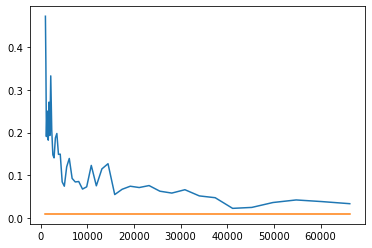

array([0.02155081, 0.08398479, 0.16173674, 0.28512571, 0.15244031,
       0.07616734, 0.01827593])

In [19]:
import matplotlib.pyplot as plt
x = [i[0] for i in runs]
y = [i[1] for i in runs]
y_bottom = [.01] * len(runs) 
plt.plot(x,y,x,y_bottom)
plt.show()
last_run

In [20]:
min(y)

0.02296886647712697

In [21]:
monte_size

72890.48368510327